# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train_orig = X_train.copy()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

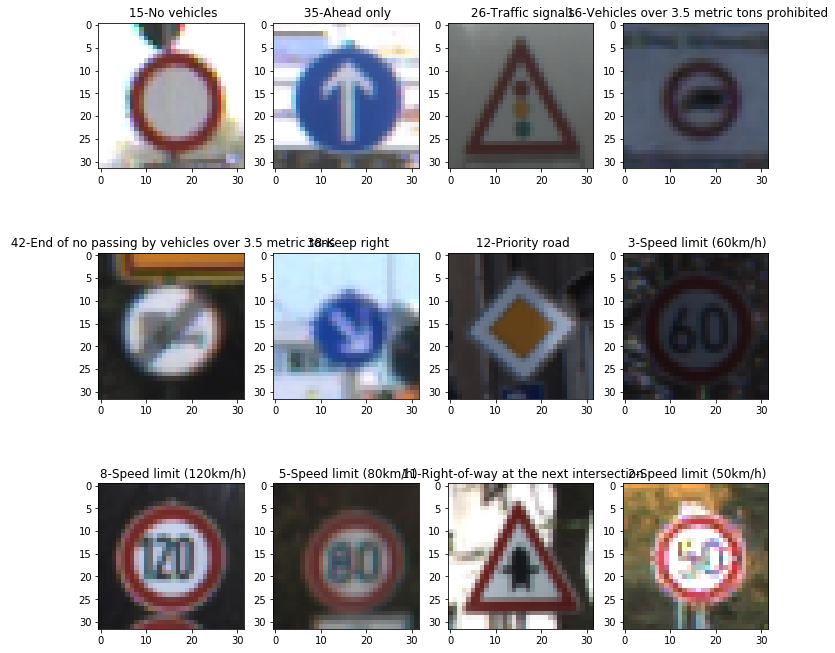

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

names = pd.read_csv('signnames.csv')
random_ids = random.sample(range(n_train),12)
plt.figure(figsize = (12, 12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[random_ids[i]])
    label = y_train[random_ids[i]]
    plt.title( " {}-{}".format(label,names["SignName"][label]))




Following are the images in gray scale for the ones displayed above. Tried using the grayscale while building the model, but that didn't improve the performance. So continued using color images only

The original image looks like below


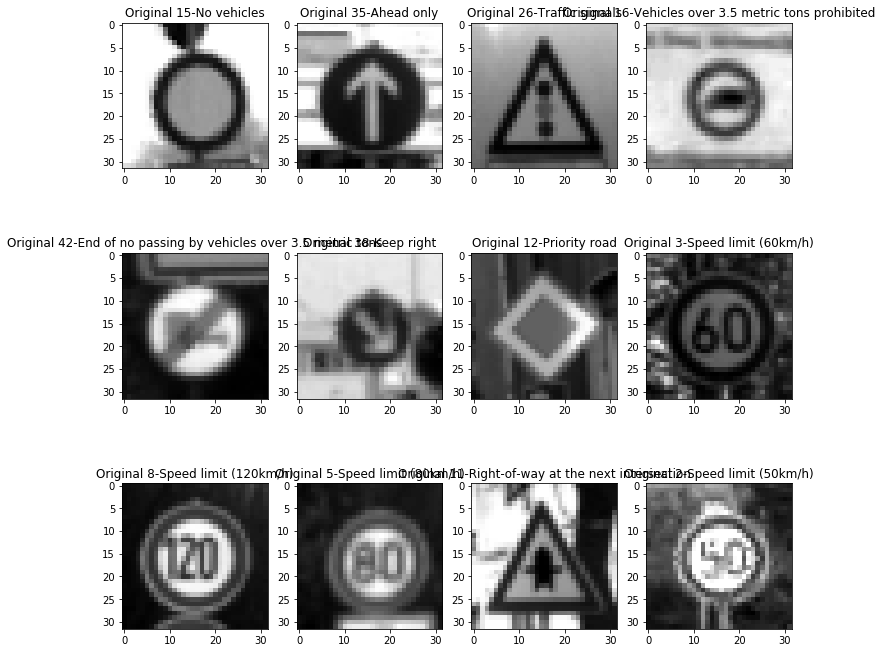

In [4]:
print('The original image looks like below')
plt.figure(figsize = (12, 12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(cv2.cvtColor(X_train[random_ids[i]], cv2.COLOR_RGB2GRAY),cmap = 'gray')
    label = y_train[random_ids[i]]
    plt.title( "Original {}-{}".format(label,names["SignName"][label]))


### Distribution of Train and Test data looks similar

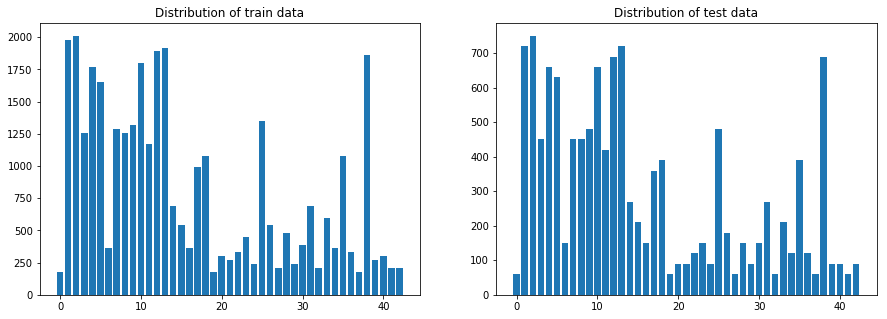

In [5]:
a = pd.Series(y_train).value_counts()
b = pd.Series(y_test).value_counts()
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.bar(a.index,a.values)
plt.title('Distribution of train data')
plt.subplot(1, 2, 2)
plt.title('Distribution of test data')
plt.bar(b.index,b.values)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Covert to gray scale 
#X_train = np.sum(X_train/3, axis=3, keepdims=True)
#X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
#X_test = np.sum(X_test/3, axis=3, keepdims=True)

#Normalize the data
X_train = (X_train.astype(float) - 128.0)/128
X_valid = (X_valid.astype(float) - 128.0)/128
X_test = (X_test.astype(float) - 128.0)/128


***Note*** Normalizing the data didn't help much for me in imporving the accuracy. Even using gray scale image didn't help much

In [7]:
import numpy as np
print(np.mean(X_train))
print(np.mean(X_test))

-0.354081335648
-0.358215153428


### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

#This parameter is tunable
EPOCHS = 120
BATCH_SIZE = 80


***Note*** After some interations found out 120 epcohs was good for me with batch size of 80. 

In [9]:
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import l2_regularizer

n_channels = X_train.shape[3]

reg_constant = 1e-5
is_training = tf.placeholder(tf.bool, shape=(), name='is_training')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')
bn_params = {
    'is_training': is_training,
    'decay': 0.99,
    'updates_collections': None
}


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, n_channels , 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


In [10]:

x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

***Learning Rate :*** Reducing the learning rate to .0001 didn't work as expected, but the default rate of .001 was strugling to fit the best model. So reduced it little to .0008 and it worked for me

In [11]:
rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.4})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.456

EPOCH 2 ...
Validation Accuracy = 0.695

EPOCH 3 ...
Validation Accuracy = 0.784

EPOCH 4 ...
Validation Accuracy = 0.845

EPOCH 5 ...
Validation Accuracy = 0.866

EPOCH 6 ...
Validation Accuracy = 0.888

EPOCH 7 ...
Validation Accuracy = 0.896

EPOCH 8 ...
Validation Accuracy = 0.913

EPOCH 9 ...
Validation Accuracy = 0.928

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.940

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.930

EPOCH 14 ...
Validation Accuracy = 0.937

EPOCH 15 ...
Validation Accuracy = 0.947

EPOCH 16 ...
Validation Accuracy = 0.946

EPOCH 17 ...
Validation Accuracy = 0.949

EPOCH 18 ...
Validation Accuracy = 0.945

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.946

EPOCH 21 ...
Validation Accuracy = 0.952

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.949

EPOCH 24 ...
Validation Accura

In [16]:

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    accuracy = evaluate(X_test, y_test)
    print('Accuracy on testing data:', accuracy)

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on testing data: 0.947030879115


In [37]:

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    accuracy = evaluate(X_train, y_train)
    print('Accuracy on training data:', accuracy)

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on training data: 0.997988449862


In [38]:

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    accuracy = evaluate(X_valid, y_valid)
    print('Accuracy on validation data:', accuracy)

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on validation data: 0.958049888784


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

The name of images that would be classified are :  ['.ipynb_checkpoints', 'test_image1.jpg', 'test_image2.jpg', 'test_image3.jpg', 'test_image4.jpg', 'test_image5.jpg']
Original size : (233, 217, 3) -> Resized shape : (32, 32, 3)
Original size : (220, 229, 3) -> Resized shape : (32, 32, 3)
Original size : (92, 92, 3) -> Resized shape : (32, 32, 3)
Original size : (92, 91, 3) -> Resized shape : (32, 32, 3)
Original size : (92, 93, 3) -> Resized shape : (32, 32, 3)


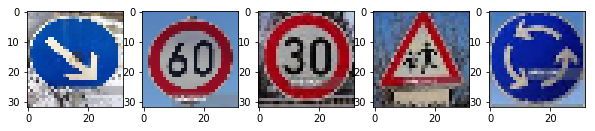

In [18]:
import os
import cv2
import pandas as pd

label_map = pd.read_csv('signnames.csv').to_dict()  #Load the label names for easy identification

images = os.listdir("new_images/")
images.sort()
print("The name of images that would be classified are : ",images)

plt.figure(figsize=(5,5))
plt.figure(figsize = (10, 3))
i = 0
web_images = []  #Store the web images
num_of_images = 5
for img_name in images:
    if '.jpg' in img_name:
        img = cv2.imread("new_images/"+img_name)
        orig_Shape = img.shape
        img = cv2.resize(img, (32, 32))
        print("Original size : {} -> Resized shape : {}".format(orig_Shape, img.shape) )
        web_images.append(img)
        plt.subplot(1, num_of_images, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i+=1
plt.show()


### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [21]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    X_web = [(img.astype(float)-128.0)/128 for img in web_images]
    label_ids = sess.run(tf.argmax(logits, 1), feed_dict={x: X_web,  keep_prob: 1.0})

## Display the label of the classified classes
print('\nFollowing is the predicted labels')
print('-------------------------------------')
for id in label_ids:
    print("{}   :   {} ".format(id, label_map["SignName"][id]))

## Correct Labels
print('\nFollowing is the actual labels')
print('-------------------------------------')
correct_labels = [38,3,1,27,40]
for label in correct_labels:
    print("{}   :   {} ".format(label, label_map["SignName"][label]))

INFO:tensorflow:Restoring parameters from ./lenet

Following is the predicted labels
-------------------------------------
38   :   Keep right 
3   :   Speed limit (60km/h) 
1   :   Speed limit (30km/h) 
36   :   Go straight or right 
12   :   Priority road 

Following is the actual labels
-------------------------------------
38   :   Keep right 
3   :   Speed limit (60km/h) 
1   :   Speed limit (30km/h) 
27   :   Pedestrians 
40   :   Roundabout mandatory 


In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
web_accuracy = sum(label_ids == correct_labels) * 1./len(label_ids) * 100
print('Accuracy on web image classification is : {}%'.format(web_accuracy))

Accuracy on web image classification is : 60.0%


#### My take on web image classification
The label 27 and 40 were misclassified above . In the training set label 27 has only 210 images  and label 40 had 300 images.
As both label 27 and 40 had very few data points, model didn't get chance to learn much about them.
One of the approached which can be taken is oversampling the labels which have very few images ( with minor tweaks ) and then train the model. I didn't try this, but feel migth improve the results

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [26]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    X_web = [(img.astype(float)-128.0)/128 for img in web_images]
    top5_label_ids = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: X_web,  keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


In [31]:
for i in range(len(top5_label_ids.values)):
    correct_label = correct_labels[i]
    correct_label_name = label_map["SignName"][correct_label]
    print( '\n\n ### Correct Label is : {}:{}'.format(correct_label,correct_label_name))
    print('--------------------------------')
    for j in range(5):
        prob = top5_label_ids.values[i][j]
        prob = round(prob,6)
        label = top5_label_ids.indices[i][j]
        label_name = label_map["SignName"][label]
        print(prob,'           ->',label,':',label_name)
    print('________________________________________')



 ### Correct Label is : 38:Keep right
--------------------------------
1.0            -> 38 : Keep right
0.0            -> 13 : Yield
0.0            -> 34 : Turn left ahead
0.0            -> 0 : Speed limit (20km/h)
0.0            -> 1 : Speed limit (30km/h)
________________________________________


 ### Correct Label is : 3:Speed limit (60km/h)
--------------------------------
0.6092            -> 3 : Speed limit (60km/h)
0.3908            -> 2 : Speed limit (50km/h)
0.0            -> 1 : Speed limit (30km/h)
0.0            -> 13 : Yield
0.0            -> 17 : No entry
________________________________________


 ### Correct Label is : 1:Speed limit (30km/h)
--------------------------------
0.999998            -> 1 : Speed limit (30km/h)
2e-06            -> 2 : Speed limit (50km/h)
0.0            -> 6 : End of speed limit (80km/h)
0.0            -> 3 : Speed limit (60km/h)
0.0            -> 0 : Speed limit (20km/h)
________________________________________


 ### Correct Label is : 2

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)


At the end the only preprossing step I did was normalizing the data. Actually I didn't see much bump in performance due to standardization, may be it would have helped in training speed. Went a head with normalization as it was emphasized in the videos eventhough didn't see much effect on final accuracy. 
I also tried converting the images to grayscale, but it didn't improve the model accuracy, so reverted back the change

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

#### Final value of hyperparameters
EPOCHS = 120 ,
BATCH_SIZE = 80 ,
rate = 0.0008 ,
mu = 0 ,
sigma = 0.1 ,
keep_probs = .4 ,

#### Model Structure

| ***Layer*** | ***is***  |
|------|------|
|Input  | 32x32x3 RGB image|
|------|------|
|   Convolution 5x5  | 1x1 stride, VALID padding, outputs 28x28x12|
|------|------|
|   RELU  | |
|------|------|
|   Max pooling 2X2 | 2X2 stride, VALID padding, Output = 14x14x12|
|------|------|
|Convolution 5x5  | 1x1 stride, VALID padding, outputs 10x10x16|
|------|------|
|   RELU  | |
|------|------|
|   Max pooling 2X2  | 2X2 stride, VALID padding, Output = 5x5x16|
|------|------|
|  FLATTEN | Output = 400|
|------|------|
|FULLY CONNECTED  | Output = 120|
|------|------|
|   RELU | |
|------|------|
|   DROP OUT  | 0.4 keep_prob |
|------|------|
|FULLY CONNECTED  | Output = 84|
|------|------|
|   RELU  | |
|------|------|
|   DROP OUT  | 0.4 keep_prob|
|------|------|
|FULLY CONNECTED (Logits) | Output = 43 |


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

***Batch Size :***
    Tried with 120,100 and 80 sizes. Then found that 80 size was good for the epoch value selected
    
****EPOCH :***
    For most of the cases around 85 epoch was sufficient, but when I lowered the learning rate I had to increase the epochs to 120 so that model fitted properly
    
***Variable weigth Initialization:***
    Tried 0.1 and 0.01 values for sigma and selected 0.1 value as the model trained better with this value. I was surprised by the impact this value had on the model
    
***Learning Rate :***
     This was one of the most important parameter I tuned. The default value of 0.001 was decent, but realized that it was struggling to find the local mimimum as after a point it was jumping between 2 numbers. So decided to reduce the learning rate, at first tried with value 0.0004 but it turned out to be too low and model was not training properly. Then tried with 0.0006 and 0.0008. Realized 0.0008 is the optimum value.

***Model Architecture :***
     Lenet architure of the lab was a good one to start with and with this only got around 93% accuracy. Later on tried with different structures for the first layer. The intuition was that first layer need to be wider than what it is in lenet as I was using color image. So increased the output depth to 12 from 6 and it improved performance.

To prevent overfitting added dropout after all the fully connected layers. Tried with various keep_prob values like 0.3,0.4,0.5,0.6 and 0.7 . In this 0.4 and 0.5 were better values. Eventhough in training value of 0.5 had a sligthly better accuracy decided to stick with 0.4 as the difference was not much and wanted to ensure that we don't have an overfitted model.

I didn't experiment much with optimizer used and sticked with the Adam Optimizer used in Lenet lab


#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

Accuracy on testing data: 0.997988449862

Accuracy on validation data: 0.958049888784

Accuracy on testing data: 0.947030879115

***Note***  The process of model architecture selection has been highligthed above. Also my findings on the web images performance is highligthed in the section above (Where I have tested the web images )

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")